In [14]:
import pandas as pd
import numpy as np


In [15]:
df = pd.read_csv("sunspot_activity .csv")


In [16]:
print("Shape:", df.shape)
print(df.info())
print(df.describe())


Shape: (9180, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9180 entries, 0 to 9179
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   9180 non-null   int64  
 1   month                  9180 non-null   int64  
 2   total_sunspots         8717 non-null   float64
 3   solar_flux             8720 non-null   float64
 4   avg_sunspot_area       8724 non-null   float64
 5   solar_cycle_phase      9180 non-null   object 
 6   geomagnetic_index      9180 non-null   int64  
 7   flare_events           9180 non-null   int64  
 8   avg_solar_wind_speed   9180 non-null   float64
 9   temperature_variation  9180 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 717.3+ KB
None
              year        month  total_sunspots   solar_flux  \
count  9180.000000  9180.000000     8717.000000  8720.000000   
mean   2001.910240     6.534423      150.313296   154.

In [17]:
df.columns

Index(['year', 'month', 'total_sunspots', 'solar_flux', 'avg_sunspot_area',
       'solar_cycle_phase', 'geomagnetic_index', 'flare_events',
       'avg_solar_wind_speed', 'temperature_variation'],
      dtype='object')

In [18]:
# Detect and handle outliers using Z-score
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculate Z-scores
z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())

# Threshold (commonly 3)
outliers_z = (z_scores > 3)

# Count outliers per column
print("Z-score Outliers per column:\n", outliers_z.sum())

# Handle outliers (optional): cap them to upper/lower bounds
for col in numeric_cols:
    upper = df[col].mean() + 3 * df[col].std()
    lower = df[col].mean() - 3 * df[col].std()
    df[col] = np.clip(df[col], lower, upper)

# --- IQR Method ---
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers_iqr = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
print("\nIQR Outliers per column:\n", outliers_iqr.sum())


Z-score Outliers per column:
 year                     0
month                    0
total_sunspots           0
solar_flux               0
avg_sunspot_area         0
geomagnetic_index        0
flare_events             0
avg_solar_wind_speed     0
temperature_variation    0
dtype: int64

IQR Outliers per column:
 year                     0
month                    0
total_sunspots           0
solar_flux               0
avg_sunspot_area         0
geomagnetic_index        0
flare_events             0
avg_solar_wind_speed     0
temperature_variation    0
dtype: int64


In [19]:
# Drop duplicates and missing values
df = df.drop_duplicates()
df = df.dropna()

# Convert date/time columns to datetime if present
for col in df.columns:
    if "date" in col.lower() or "time" in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')

print("After Cleaning:")
print(df.info())


After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 7718 entries, 0 to 8999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   7718 non-null   int64  
 1   month                  7718 non-null   int64  
 2   total_sunspots         7718 non-null   float64
 3   solar_flux             7718 non-null   float64
 4   avg_sunspot_area       7718 non-null   float64
 5   solar_cycle_phase      7718 non-null   object 
 6   geomagnetic_index      7718 non-null   int64  
 7   flare_events           7718 non-null   int64  
 8   avg_solar_wind_speed   7718 non-null   float64
 9   temperature_variation  7718 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 663.3+ KB
None


In [20]:
arr = df.select_dtypes(include=[np.number]).to_numpy()
print("Array Shape:", arr.shape)
print("Array Dimensions:", arr.ndim)
print("Data Type:", arr.dtype)
print("Total Elements:", arr.size)


Array Shape: (7718, 9)
Array Dimensions: 2
Data Type: float64
Total Elements: 69462


In [21]:
numeric_df = df.select_dtypes(include=[np.number])

print("Column Means:\n", numeric_df.mean())
print("Column Std:\n", numeric_df.std())
print("Column Min:\n", numeric_df.min())
print("Column Max:\n", numeric_df.max())

# Example comparison: values above column mean
for col in numeric_df.columns:
    df[f"{col}_above_mean"] = numeric_df[col] > numeric_df[col].mean()

df.head()


Column Means:
 year                     2001.911117
month                       6.542498
total_sunspots            150.127753
solar_flux                154.794834
avg_sunspot_area         1029.288546
geomagnetic_index           3.969811
flare_events               14.642783
avg_solar_wind_speed      527.978479
temperature_variation       0.150587
dtype: float64
Column Std:
 year                      12.952085
month                      3.455329
total_sunspots            86.303391
solar_flux                55.122600
avg_sunspot_area         564.021498
geomagnetic_index          2.589739
flare_events               8.916427
avg_solar_wind_speed     158.968051
temperature_variation      0.202604
dtype: float64
Column Min:
 year                     1980.00
month                       1.00
total_sunspots              0.00
solar_flux                 60.01
avg_sunspot_area           50.00
geomagnetic_index           0.00
flare_events                0.00
avg_solar_wind_speed      250.00
temperat

,year,month,total_sunspots,solar_flux,avg_sunspot_area,solar_cycle_phase,geomagnetic_index,flare_events,avg_solar_wind_speed,temperature_variation,year_above_mean,month_above_mean,total_sunspots_above_mean,solar_flux_above_mean,avg_sunspot_area_above_mean,geomagnetic_index_above_mean,flare_events_above_mean,avg_solar_wind_speed_above_mean,temperature_variation_above_mean
0,2011,11,3.0,131.23,544.0,Rising,1,0,385.8,-0.157,True,True,False,False,False,False,False,False,False
1,1989,7,244.0,60.59,1740.0,Declining,5,22,332.5,-0.128,False,True,True,False,True,True,True,False,False
3,2004,6,223.0,168.65,900.0,Declining,7,15,392.8,0.252,True,False,True,True,False,True,True,False,True
4,1980,7,227.0,70.23,787.0,Declining,0,20,544.1,0.229,False,True,True,False,False,False,True,True,True
5,2001,6,40.0,164.72,1065.0,Minimum,8,2,365.8,0.352,False,False,False,True,True,True,False,False,True


In [22]:
# Group by categorical columns (if any)
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nAggregation by {col}:")
    print(df.groupby(col).agg(['mean', 'max', 'min']).head())

# General numeric aggregation
print("Numeric Summary:")
print(df.describe())



Aggregation by solar_cycle_phase:
                          year                 month         total_sunspots  \
                          mean   max   min      mean max min           mean   
solar_cycle_phase                                                             
Declining          2001.847160  2024  1980  6.549701  12   1     153.054559   
Minimum            2001.411207  2024  1980  6.487069  12   1     153.541379   
Peak               2001.990788  2024  1980  6.563460  12   1     148.957523   
Rising             2002.219917  2024  1980  6.544606  12   1     145.197614   

                               solar_flux  ... geomagnetic_index_above_mean  \
                     max  min        mean  ...                          min   
solar_cycle_phase                          ...                                
Declining          299.0  0.0  154.800493  ...                        False   
Minimum            299.0  0.0  152.347698  ...                        False   
Peak            

In [23]:
numeric_df = df.select_dtypes(include=[np.number])
df_scaled = (numeric_df - numeric_df.mean()) / numeric_df.std()
print("Scaled numeric data (first 5 rows):")
print(df_scaled.head())



Scaled numeric data (first 5 rows):
       year     month  total_sunspots  solar_flux  avg_sunspot_area  \
0  0.701731  1.290037       -1.704774   -0.427499         -0.860408   
1 -0.996837  0.132405        1.087701   -1.709006          1.260079   
3  0.161278 -0.157003        0.844373    0.251352         -0.229226   
4 -1.691706  0.132405        0.890721   -1.534123         -0.429573   
5 -0.070345 -0.157003       -1.276054    0.180056          0.063316   

   geomagnetic_index  flare_events  avg_solar_wind_speed  \
0          -1.146761     -1.642225             -0.894384   
1           0.397797      0.825131             -1.229671   
3           1.170075      0.040063             -0.850350   
4          -1.532900      0.600825              0.101414   
5           1.556215     -1.417920             -1.020195   

   temperature_variation  
0              -1.518166  
1              -1.375030  
3               0.500548  
4               0.387027  
5               0.994122  


In [24]:
split_index = len(arr) // 2
arr1, arr2 = np.split(arr, [split_index])
combined = np.concatenate((arr1, arr2), axis=0)
print("Recombined shape:", combined.shape)


Recombined shape: (7718, 9)


In [25]:
print("NumPy Aggregations:")
print("Mean:", np.mean(arr))
print("Std:", np.std(arr))
print("Min:", np.min(arr))
print("Max:", np.max(arr))


NumPy Aggregations:
Mean: 432.15626758515447
Std: 672.1345482093287
Min: -0.2
Max: 2024.0


In [26]:
df.to_csv("sunspot_activity_cleaned.csv", index=False)

# Reload to confirm
check = pd.read_csv("sunspot_activity_cleaned.csv")
print("Reloaded shape:", check.shape)


Reloaded shape: (7718, 19)


In [27]:
print("Final Dataset Summary:")
print(df.info())
print(df.describe())


Final Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 7718 entries, 0 to 8999
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              7718 non-null   int64  
 1   month                             7718 non-null   int64  
 2   total_sunspots                    7718 non-null   float64
 3   solar_flux                        7718 non-null   float64
 4   avg_sunspot_area                  7718 non-null   float64
 5   solar_cycle_phase                 7718 non-null   object 
 6   geomagnetic_index                 7718 non-null   int64  
 7   flare_events                      7718 non-null   int64  
 8   avg_solar_wind_speed              7718 non-null   float64
 9   temperature_variation             7718 non-null   float64
 10  year_above_mean                   7718 non-null   bool   
 11  month_above_mean                  7718 non-null   b

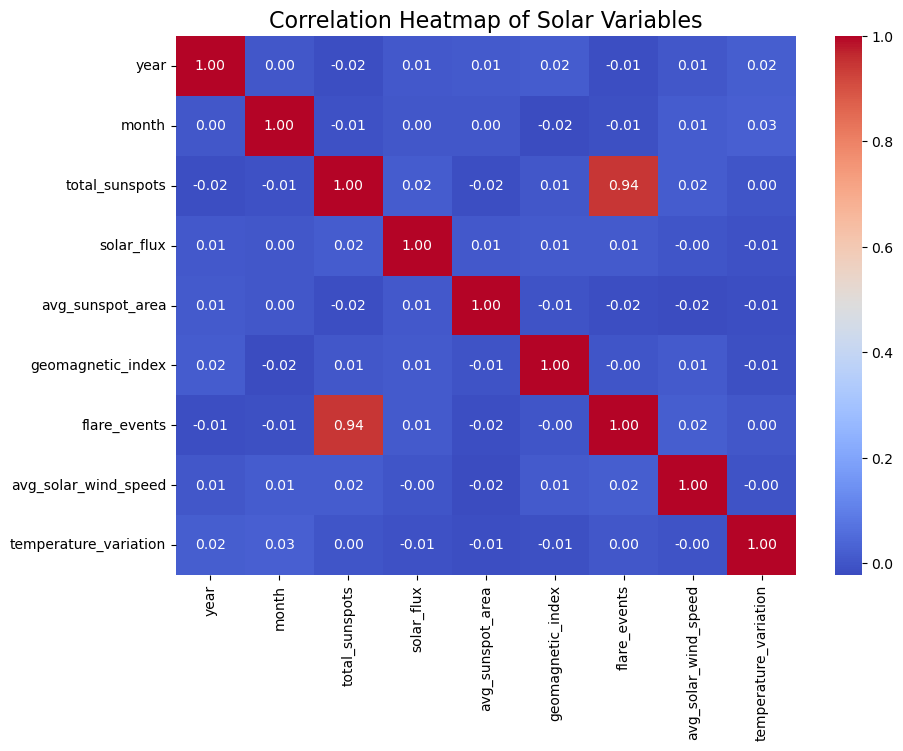

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Solar Variables", fontsize=16)
plt.show()


C:\Users\Mukil\AppData\Local\Temp\ipykernel_21132\2115075494.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Feature', y='Value', data=melted_df, palette='coolwarm', fliersize=3)


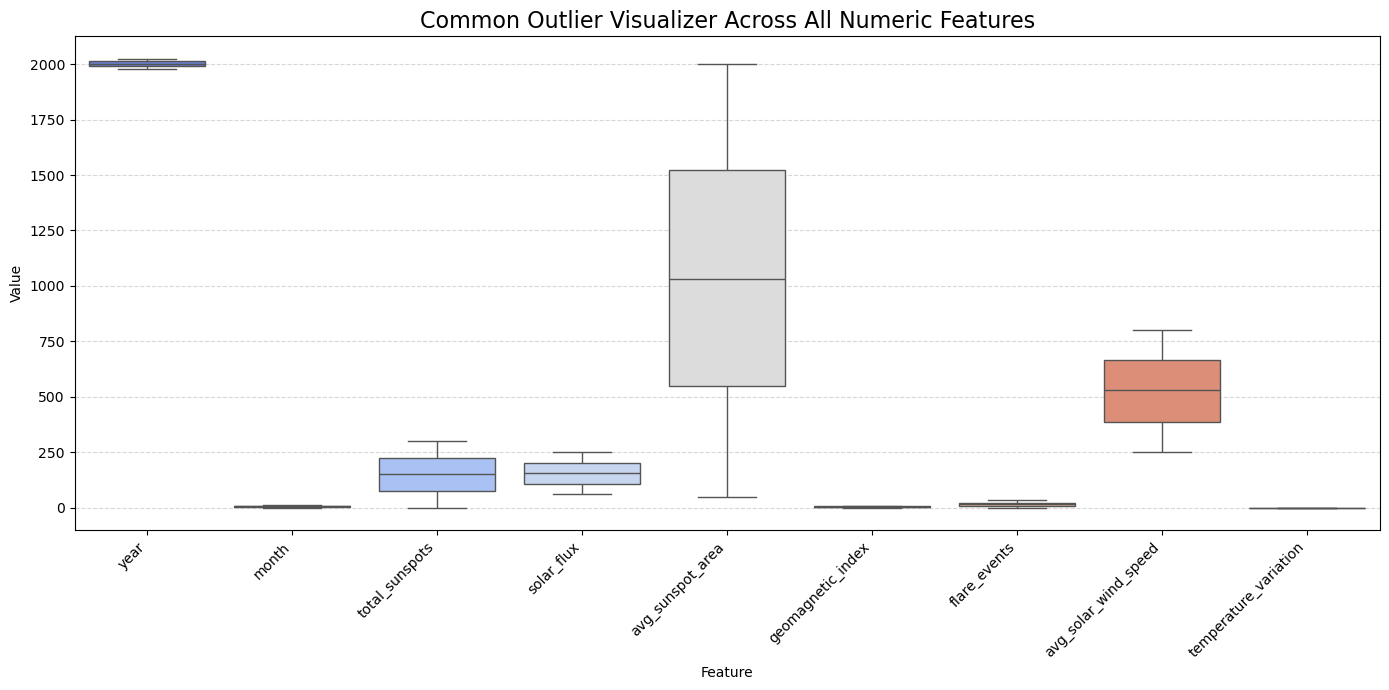

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Melt the DataFrame for Seaborn
melted_df = numeric_df.melt(var_name='Feature', value_name='Value')

# Plot
plt.figure(figsize=(14,7))
sns.boxplot(x='Feature', y='Value', data=melted_df, palette='coolwarm', fliersize=3)
plt.title("Common Outlier Visualizer Across All Numeric Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
